In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analisis exploratorio de datos - Parte 3

Vamos a seguir trabajando en el análisis exploratorio de datos, pero esta vez vamos a dar un enfoque similar a como podrías proceder en buscar datos para tu propio **proyecto**.


## Extracción de datos.

hemos aprendido durante el curso que podemos extraer datos de internet ya sea descargándolos, haciendo WebScrapping o bien solicitándolos a entidades públicas y privadas con ciertos acuerdos de garantizar la privacidad de las personas, si es que los datos son de carácter sensible. 

No obstante no hemos visto una cuarta opción que es sacar datos a través de una **API**.

## ¿Qué es una API?

Una [API](https://www.ibm.com/mx-es/topics/api) es un conjunto de reglas que permiten que distintas aplicaciones de Software se comuniquen entre sí para intercambiar cosas.
En nuestro caso nos interesan las APIS que intercambian datos pues estamos buscando datos para nuestros proyectos.

## Datos de carácter macroeconómicos.

Ahora bien, pongámonos en el caso de que para nuestro proyecto nos interese hacer un cruce entre la información entre el avance de ciertos **estadísticos económicos y valores de viviendas**.

Una vez hecho un análisis exhaustivo en internet, hemos encontrado dos fuentes confiables de datos para esto:

1. **Banco Central**: Nos damos cuenta que el banco central posee una API que permite obtener datos de caracter macroeconómico en tiempo real, por lo que utilizaremos la API de esta institución para obtener algunos datos.

2. **ClapesUC**: El centro latinoamericano de políticas económicas y sociales UC ha hecho sus propios estudios sobre el índice de precios residenciales por lo que nos interesaría contrastar los estudios de esta institución con los del BancoCentral.


# Extracción de datos del Banco Central de nuestro país:

Como vimos previamente, el Banco Central posee su propia API. Para utilizarla debes crearte una cuenta [aquí](https://si3.bcentral.cl/Siete/es/Siete/API?respuesta=).

Una vez tenga creadas tu cuenta y te hayas logeado, debes darle click a activar API y ya podrás utilizarla.


Aprender a uilizar esta API **no es complicado**, posee una documentación muy amigable.

Lo bueno de esto, es que el Banco Central desarrolló su propia librería de Python para poder interactuar directamente con la API.


In [2]:
#!pip install bcchapi 
import bcchapi

In [3]:
##Iniciamos sesion en la API
siete = bcchapi.Siete(file="user.txt")

### Ahora para extraer los datos de la API, debemos darle instrucciones a la API. Esto se hace con un método de la librería llamado **cuadro**

```
siete.cuadro(
  series: Recibe una lista con códigos relacionados al número de serie de los indicadores Macroeconómicos que nos interesa,
  nombres = Recibe una lista con los nombres de cada indicador,
  desde= Fecha inicial en string en formato YYYY-MM-DD,
  hasta= Fecha final en string,
  variacion= Incluye variaciones a los valores,
  frecuencia=Frecuencia de los datos (Si queremos datos anuales, mensuales o diarios)"YE",
  observado=Para cada indicador nos arroja como queremos el valor: Puede ser la media, el ultimo valor (last), entre otros.
)
```
**Adicional: El Banco Central proporciona el número de serie de cada indicador en un archivo excel que se encuentra [Aquí](https://si3.bcentral.cl/estadisticas/Principal1/Web_Services/Webservices/series.xlsx)**.

Veamos esto con el efecto del valor diario de la UF.

In [4]:
uf = siete.cuadro(
    series=['F073.UFF.PRE.Z.D'],
    nombres = ['Unidad de fomento (UF)'],
    desde='2007-01-01',
    hasta='2024-12-14',
    variacion=0,
    frecuencia='d',
    observado={'Unidad de fomento (UF)': 'last'}
)
uf

,Unidad de fomento (UF)
2007-01-01,18335.20
2007-01-02,18334.01
2007-01-03,18332.83
2007-01-04,18331.64
2007-01-05,18330.46
...,...
2024-11-05,37977.55
2024-11-06,37978.77
2024-11-07,37980.00
2024-11-08,37981.22


In [5]:
##Guardamos la serie en un archivo csv
uf.reset_index(inplace=True)
uf.rename(columns={'index': 'date'}, inplace=True)
uf.to_csv('collected_data/uf.csv', index=False)

## Haremos lo mismo con un indicador macroeconómico muy importante: El [IMACEC](https://www.bcentral.cl/areas/estadisticas/imacec)

In [6]:
imacec = siete.cuadro(
series=["F032.IMC.IND.Z.Z.EP18.Z.Z.0.M"],
  nombres = ["imacec"],
  desde="2007-01-01",
  hasta="2023-10-14",
  variacion=0,
  frecuencia="M",
  observado={"imacec":'last'}
)
imacec

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.12/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


,imacec
2007-01-31,67.845191
2007-02-28,65.116565
2007-03-31,73.244219
2007-04-30,71.488096
2007-05-31,71.440799
...,...
2023-06-30,105.055006
2023-07-31,102.355933
2023-08-31,107.040298
2023-09-30,104.960454


In [7]:
imacec.reset_index(inplace=True)
imacec.rename(columns={'index':'date'}, inplace=True)
imacec.to_csv('collected_data/imacec.csv', index=False)

## Y por último el PIB por actividad económica por región. Para ello vamos a cargar el archivo series, con el fin de obtener todas las series por región del indicador que nos interesa.

En este caso el indicador es PIB por actividad económica, Regional, en Servicios de vivienda e inmobiliarios.

**(Este es un indicador anual)**


In [8]:
series_df = pd.read_excel('series.xlsx')
series_df

,CAPÍTULO,NOMBRE CUADRO,CÓDIGO,NOMBRE DE LA SERIE
0,Cuentas Nacionales,"Indicador mensual de actividad económica, Imac...",F032.IMC.IND.Z.Z.EP18.Z.Z.0.M,Imacec
1,Cuentas Nacionales,"Indicador mensual de actividad económica, Imac...",F032.IMC.IND.Z.Z.EP18.PB.Z.0.M,Producción de bienes
2,Cuentas Nacionales,"Indicador mensual de actividad económica, Imac...",F032.IMC.IND.Z.Z.EP18.03.Z.0.M,Minería
3,Cuentas Nacionales,"Indicador mensual de actividad económica, Imac...",F032.IMC.IND.Z.Z.EP18.04.Z.0.M,Industria
4,Cuentas Nacionales,"Indicador mensual de actividad económica, Imac...",F032.IMC.IND.Z.Z.EP18.RB.Z.0.M,Resto de bienes
...,...,...,...,...
28374,Capitulo BDE Movil Azure,Deuda bruta Gobierno Central (porcentaje del PIB),F051.D7.PPB.C.Z.Z.T,Deuda bruta Gobierno Central (porcentaje del PIB)
28375,Capitulo BDE Movil Azure,Deuda neta Gobierno Central (porcentaje del PIB),F051.D9.PPB.C.Z.Z.T,Deuda neta Gobierno Central (porcentaje del PIB)
28376,Capitulo BDE Movil Azure,Deuda bruta Banco Central (porcentaje del PIB),F051.E7.PPB.H.Z.Z.T,Deuda bruta Banco Central (porcentaje del PIB)
28377,Capitulo BDE Movil Azure,Deuda neta Banco Central (porcentaje del PIB),F051.E8.PPB.H.Z.Z.T,Deuda neta Banco Central (porcentaje del PIB)


## Y filtramos por lo pedido 

In [9]:
series_filtradas = series_df[(series_df['CAPÍTULO'] == 'Regionales') & (series_df['NOMBRE DE LA SERIE'] == 'Servicios de vivienda e inmobiliarios')]
series_filtradas

,CAPÍTULO,NOMBRE CUADRO,CÓDIGO,NOMBRE DE LA SERIE
22390,Regionales,"PIB por actividad económica, Región de Arica ...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.15.0.A,Servicios de vivienda e inmobiliarios
22404,Regionales,"PIB por actividad económica, Región de Tarapac...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.01.0.A,Servicios de vivienda e inmobiliarios
22418,Regionales,"PIB por actividad económica, Región de Antofag...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.02.0.A,Servicios de vivienda e inmobiliarios
22432,Regionales,"PIB por actividad económica, Región de Atacama...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.03.0.A,Servicios de vivienda e inmobiliarios
22446,Regionales,"PIB por actividad económica, Región de Coquimb...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.04.0.A,Servicios de vivienda e inmobiliarios
...,...,...,...,...
25189,Regionales,"PIB por actividad económica, Región de Los Lag...",F035.PIB.V12.R.CLP.2018.10.Z.Z.10.0.A,Servicios de vivienda e inmobiliarios
25259,Regionales,"PIB por actividad económica, Región de Aysén d...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.11.0.A,Servicios de vivienda e inmobiliarios
25273,Regionales,"PIB por actividad económica, Región de Aysén d...",F035.PIB.V12.R.CLP.2018.10.Z.Z.11.0.A,Servicios de vivienda e inmobiliarios
25342,Regionales,"PIB por actividad económica, Región de Magalla...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.12.0.A,Servicios de vivienda e inmobiliarios


## Nos quedamos con las 16 primeras ya que sabemos que el país tiene 16 regiones, por lo que cada 16 filas hay un tipo de PIB por actividad económica en algún formato.

In [10]:
series_nombre = series_filtradas[0:15+1]
series_nombre

,CAPÍTULO,NOMBRE CUADRO,CÓDIGO,NOMBRE DE LA SERIE
22390,Regionales,"PIB por actividad económica, Región de Arica ...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.15.0.A,Servicios de vivienda e inmobiliarios
22404,Regionales,"PIB por actividad económica, Región de Tarapac...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.01.0.A,Servicios de vivienda e inmobiliarios
22418,Regionales,"PIB por actividad económica, Región de Antofag...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.02.0.A,Servicios de vivienda e inmobiliarios
22432,Regionales,"PIB por actividad económica, Región de Atacama...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.03.0.A,Servicios de vivienda e inmobiliarios
22446,Regionales,"PIB por actividad económica, Región de Coquimb...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.04.0.A,Servicios de vivienda e inmobiliarios
22460,Regionales,"PIB actividad económica, Región de Valparaíso,...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.05.0.A,Servicios de vivienda e inmobiliarios
22474,Regionales,"PIB por actividad económica, Región Metropolit...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.13.0.A,Servicios de vivienda e inmobiliarios
22488,Regionales,"PIB por actividad económica, Región del Libert...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.06.0.A,Servicios de vivienda e inmobiliarios
22502,Regionales,"PIB por actividad económica, Región del Maule,...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.07.0.A,Servicios de vivienda e inmobiliarios
22516,Regionales,"PIB por actividad económica, Región de Ñuble, ...",F035.PIB.FLU.R.CLP.2018.10.Z.Z.16.0.A,Servicios de vivienda e inmobiliarios


In [11]:
serie = list(series_nombre['CÓDIGO'])
names = list(series_nombre['NOMBRE CUADRO'])
observed = {name: lambda x: x.tail(1) for name in names} ##Nos arroja el último valor. Similar a Last

In [12]:
pib_act_econo_reg = siete.cuadro(
    series= serie,
    nombres= names,
    desde='2007-01-01',
    hasta='2024-10-14',
    variacion=0,
    frecuencia='Y',
    observado= observed
)
pib_act_econo_reg

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.12/site-packages/bcchapi/siete.py:132: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled = df.resample(frequency, **resample_kw)


,"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Biobío, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de La Araucanía, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Ríos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Lagos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Aysén del General Carlos Ibáñez del Campo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Magallanes y de la Antártica Chilena, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)"
2013-12-31,139.974359,214.220570,429.995579,200.009659,452.318555,1435.795983,6225.368832,566.017077,595.178067,263.410982,944.943641,506.232520,197.391533,433.370254,64.078988,147.320638
2014-12-31,143.099545,220.028624,441.285704,205.087467,467.252982,1475.324047,6396.232222,583.272894,613.817433,271.942972,975.560570,522.070397,201.995256,447.096005,65.776491,154.254514
2015-12-31,143.744603,228.245607,449.598218,206.710322,482.543130,1510.162663,6572.576770,604.610649,636.209397,281.913439,1010.633957,533.345596,210.404731,464.714991,67.768228,158.551822
2016-12-31,143.814212,231.237348,450.227632,207.003073,496.165164,1547.138581,6637.584679,626.270250,661.906255,289.095984,1037.672200,552.320998,218.096284,480.347217,69.941365,160.346499
2017-12-31,147.073714,236.553710,454.615390,210.773540,514.774936,1578.563905,6771.272561,645.102880,690.124594,298.269478,1066.952294,572.875721,225.076095,495.567375,72.524654,161.744408
2018-12-31,153.193345,247.935774,469.184858,215.114600,546.771923,1622.199806,6991.232113,670.055564,715.666507,309.304160,1107.039527,598.169739,233.826616,5

In [13]:
pib_act_econo_reg.reset_index(inplace=True)
pib_act_econo_reg.rename(columns={'index':'date'}, inplace=True)
pib_act_econo_reg.to_csv('collected_data/pib_act_econo_reg.csv', index=False)

## Finalmente extraer los datos de ClapesUC

In [14]:
## Descargar datos de este link
url = 'https://s3.us-east-2.amazonaws.com/assets.clapesuc.cl/index_casas_255_2ffe46eae4.xlsx'
indice_precios_inmobiliario = pd.read_excel(url)
indice_precios_inmobiliario

,Trimestre,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana
0,2007q1,100.000000,100.000000,100.000000,100.000000,100.000000
1,2007q2,92.181679,101.316696,99.783646,99.185928,97.687912
2,2007q3,96.565620,101.296288,102.066605,102.251045,100.375008
3,2007q4,97.691315,101.209557,99.031158,99.222595,98.882362
4,2008q1,96.749405,102.203354,102.843727,101.795212,100.717987
...,...,...,...,...,...,...
63,2022q4,230.578247,202.499451,211.454132,208.156158,204.795624
64,2023q1,231.746201,205.596054,216.340942,197.747147,203.102997
65,2023q2,217.563705,203.551392,208.054031,201.367554,200.483200
66,2023q3,244.673538,201.171524,214.709167,202.398743,205.042236


# ¡Empecemos el análisis exploratorio de datos!

### Para la UF, lo normal sería revisarlo con Scatter Plot, donde el eje X es la fecha y el eje Y el valor de la UF.

In [15]:
import seaborn as sns

<Axes: xlabel='date', ylabel='Unidad de fomento (UF)'>

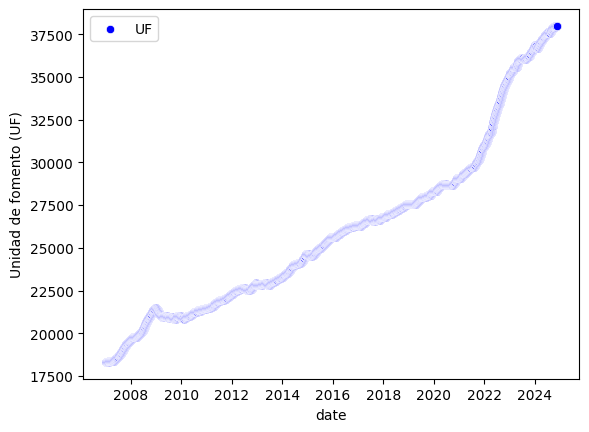

In [16]:
sns.scatterplot(x=uf['date'], y=uf['Unidad de fomento (UF)'], color='blue', label='UF')


## En cuanto al IMACEC nos puede interesas la variación mensual (Cuanto varía entre un mes y otro, con el fin de saber si la economia avanza rápidamente o se está estancando.)

In [17]:
import matplotlib.dates as mdates

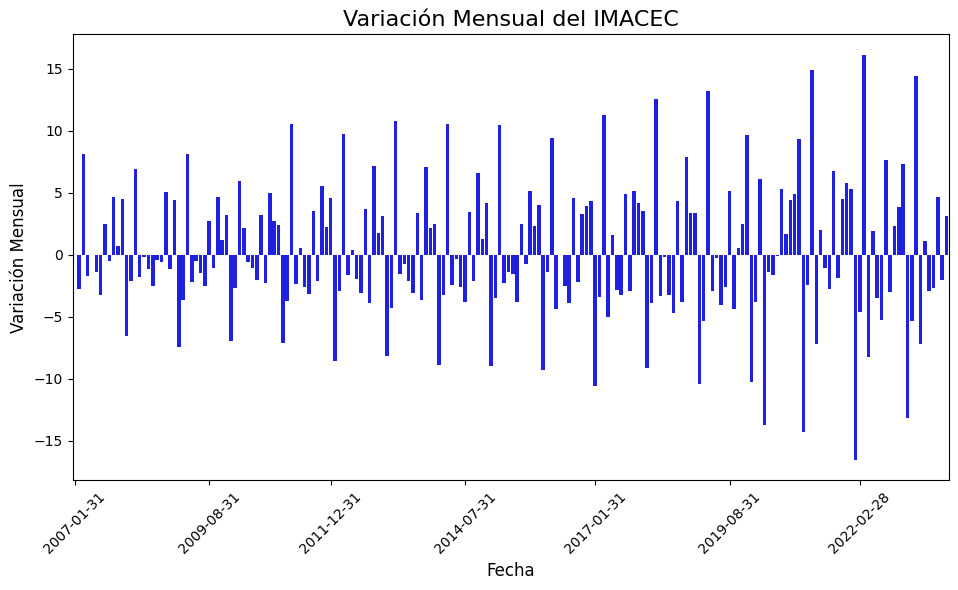

In [18]:
# Calculamos la variación mensual
imacec['variacion_mensual'] = imacec['imacec'].diff()  ##Diferencia entre el valor actual y el anterior en la columna imacec

plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='variacion_mensual', data=imacec, color='b')
plt.title('Variación Mensual del IMACEC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación Mensual', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Esto lo usamos para reducir la cantidad de meses que se muestran en el eje X

plt.show()


# Cruce de datos


Los datos de ClapesUC están dividos por trimestres, mientras que los datos del pib de la actividad economica regional es anual. 

Parece lógico que queramos comparar como avanza el PIB mensual en en Chile en el aspecto inmobiliario con el indice de precios Inmobiliarios de ClapesUC, ya que nos podría revelar alguna correlación.

In [19]:
#Primero creamos un dataset de clapesUC pero anual
#Como los datos estan separados por trimestres (ej: 2007q1, 2007q2, 2007q3, 2007q4), primero los agrupamos por año
#son 68 filas, y cada 4 valores se repite el año
indice_precios_inmobiliario['year'] = indice_precios_inmobiliario['Trimestre'].apply(lambda x:x[0:4]) ##Esto permite extraer los 4 primeros digitos de la columna Trimestre
indice_precios_inmobiliario

,Trimestre,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana,year
0,2007q1,100.000000,100.000000,100.000000,100.000000,100.000000,2007
1,2007q2,92.181679,101.316696,99.783646,99.185928,97.687912,2007
2,2007q3,96.565620,101.296288,102.066605,102.251045,100.375008,2007
3,2007q4,97.691315,101.209557,99.031158,99.222595,98.882362,2007
4,2008q1,96.749405,102.203354,102.843727,101.795212,100.717987,2008
...,...,...,...,...,...,...,...
63,2022q4,230.578247,202.499451,211.454132,208.156158,204.795624,2022
64,2023q1,231.746201,205.596054,216.340942,197.747147,203.102997,2023
65,2023q2,217.563705,203.551392,208.054031,201.367554,200.483200,2023
66,2023q3,244.673538,201.171524,214.709167,202.398743,205.042236,2023


## Ahora calculamos, quitamos la columna Trimestre, y calculamos la media segun el año.

In [20]:
indice_precios_inmobiliario.drop(columns='Trimestre', inplace=True)
indice_precios_inmobiliario['year'] = indice_precios_inmobiliario['year'].astype(int)
indice_precios_inmobiliario = indice_precios_inmobiliario.groupby('year').mean()
indice_precios_inmobiliario.reset_index(inplace=True)

In [21]:
indice_precios_inmobiliario

,year,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana
0,2007,96.609653,100.955635,100.220352,100.164892,99.236320
1,2008,96.858545,102.380136,102.482819,99.646544,100.172199
2,2009,93.708078,98.165895,97.401615,95.992250,95.478468
3,2010,107.247530,108.091223,106.876486,105.522095,106.812935
4,2011,118.603594,113.845516,112.174290,110.447035,113.110138
5,2012,129.813620,113.594810,114.889242,112.985374,116.384905
6,2013,148.297718,121.239374,123.752836,120.747982,125.257732
7,2014,164.433422,131.499269,133.425880,128.630316,135.027668
8,2015,181.886944,146.844196,146.744038,142.122524,149.462933
9,2016,183.128872,157.024094,152.397488,149.385132,155.390568


## Ahora los comparamos.

OJO: las unidades de medidas de los dataset son distintas, por lo que para hacer la comparación lo ideal sería normalizar las tablas.

Spoiler: Para normalizar entre 0 y 1 podemos usar MinMaxScaler de Sklearn (Esta librería ya la vamos a ver pero de momento lo importante es conocerla.)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
#normalizar los datos entre 0 y 1
scaler = MinMaxScaler() # Llamar a minMaxScaler
scaled_values = scaler.fit_transform(indice_precios_inmobiliario.drop(columns='year')) # Fit lo que hace es calcular los valores mínimos y máximos de cada columna y transform lo que hace es aplicar la transformación a los datos. Sacamos el año porque no es necesario normalizarlo

indice_precios_inmobiliario_scaled = pd.DataFrame(scaled_values, columns=indice_precios_inmobiliario.columns[1:])
indice_precios_inmobiliario_scaled['year'] = indice_precios_inmobiliario['year']
indice_precios_inmobiliario_scaled

,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana,year
0,0.019327,0.024823,0.023446,0.036983,0.032419,2007
1,0.020985,0.037498,0.042264,0.032389,0.040493,2008
2,0.000000,0.000000,0.000000,0.000000,0.000000,2009
3,0.090184,0.088315,0.078809,0.084465,0.097783,2010
4,0.165826,0.139517,0.122875,0.128115,0.152109,2011
5,0.240494,0.137286,0.145457,0.150613,0.180361,2012
6,0.363614,0.205307,0.219182,0.219414,0.256907,2013
7,0.471092,0.296599,0.299640,0.289276,0.341193,2014
8,0.587347,0.433138,0.410417,0.408860,0.465727,2015
9,0.595620,0.523718,0.457441,0.473230,0.516865,2016


In [32]:
#por ultimo vamos a reducir el dataset a la fecha desde 2013 hasta 2023
indice_precios_inmobiliario_scaled = indice_precios_inmobiliario_scaled[indice_precios_inmobiliario_scaled['year'] >= 2013]
indice_precios_inmobiliario_scaled.reset_index(drop=True, inplace=True)
indice_precios_inmobiliario_scaled

,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana,year
0,0.363614,0.205307,0.219182,0.219414,0.256907,2013
1,0.471092,0.296599,0.299640,0.289276,0.341193,2014
2,0.587347,0.433138,0.410417,0.408860,0.465727,2015
3,0.595620,0.523718,0.457441,0.473230,0.516865,2016
4,0.652899,0.553766,0.508473,0.551718,0.570418,2017
5,0.774932,0.654446,0.619665,0.644229,0.680557,2018
6,0.831565,0.747012,0.712501,0.742755,0.770576,2019
7,0.862109,0.807301,0.798050,0.843959,0.848992,2020
8,1.000000,0.962220,1.000000,1.000000,1.000000,2021
9,0.936052,1.000000,0.956851,0.978106,0.965317,2022


Y hacemos lo mismo con pib_act_econo_reg

In [33]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(pib_act_econo_reg.drop(columns='date'))

pib_act_econo_reg_scaled = pd.DataFrame(scaled_values, columns=pib_act_econo_reg.columns[1:])
pib_act_econo_reg_scaled['date'] = pib_act_econo_reg['date']
pib_act_econo_reg_scaled

,"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Biobío, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de La Araucanía, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Ríos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Lagos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Aysén del General Carlos Ibáñez del Campo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Magallanes y de la Antártica Chilena, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",date
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013-12-31
1,0.100384,0.092327,0.126003,0.129438,0.073905,0.102203,0.132444,0.083731,0.071767,0.082465,0.091937,0.076092,0.054945,0.077160,0.092879,0.272824,2014-12-31
2,0.121104,0.222946,0.218775,0.170806,0.149571,0.192281,0.269137,0.187270,0.157982,0.178833,0.197255,0.130263,0.155310,0.176206,0.201856,0.441908,2015-12-31
3,0.123340,0.270504,0.225800,0.178268,0.216981,0.287886,0.319527,0.292370,0.256921,0.248255,0.278446,0.221428,0.247108,0.264083,0.320759,0.512522,2016-12-31
4,0.228039,0.355014,0.274769,0.274381,0.309074,0.369138,0.423155,0.383752,0.365570,0.336920,0.366368,0.320182,0.330411,0.349644,0.462103,0.567525,2017-12-31
5,0.424609,0.535947,0.437372,0.385039,0.467416,0.481963,0.593655,0.504832,0.463913,0.443574,0.486743,0.441705,0.434847,0.459767,0.575922,0.533092,2018-12-31
6,0.455335,0.639150,0.510549,0.416513,0.602281,0.555574,0.626697,0.588428,0.550050,0.513814,0.561232,0.534293,0.518724,0.560079,0.625700,0.513423,2019-12-

In [34]:
pib_act_econo_reg_scaled['year'] = indice_precios_inmobiliario_scaled['year']
pib_act_econo_reg_scaled

,"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Biobío, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de La Araucanía, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Ríos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Los Lagos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Aysén del General Carlos Ibáñez del Campo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Magallanes y de la Antártica Chilena, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",date,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013-12-31,2013
1,0.100384,0.092327,0.126003,0.129438,0.073905,0.102203,0.132444,0.083731,0.071767,0.082465,0.091937,0.076092,0.054945,0.077160,0.092879,0.272824,2014-12-31,2014
2,0.121104,0.222946,0.218775,0.170806,0.149571,0.192281,0.269137,0.187270,0.157982,0.178833,0.197255,0.130263,0.155310,0.176206,0.201856,0.441908,2015-12-31,2015
3,0.123340,0.270504,0.225800,0.178268,0.216981,0.287886,0.319527,0.292370,0.256921,0.248255,0.278446,0.221428,0.247108,0.264083,0.320759,0.512522,2016-12-31,2016
4,0.228039,0.355014,0.274769,0.274381,0.309074,0.369138,0.423155,0.383752,0.365570,0.336920,0.366368,0.320182,0.330411,0.349644,0.462103,0.567525,2017-12-31,2017
5,0.424609,0.535947,0.437372,0.385039,0.467416,0.481963,0.593655,0.504832,0.463913,0.443574,0.486743,0.441705,0.434847,0.459767,0.575922,0.533092,2018-12-31,2018
6,0.455335,0.639150,0.510549,0.416513,0.602281,0.555574,0.626697,0.588428,0.550050,0.513814,0.561232,0.534293,0.518724,

In [35]:
# mergeados los datasets
pib_act_econo_reg_scaled['year'] = indice_precios_inmobiliario_scaled['year']
merged_df = pd.merge(pib_act_econo_reg_scaled, indice_precios_inmobiliario_scaled, on='year', how='inner')
merged_df


,"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",...,"PIB por actividad económica, Región de Los Lagos, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Aysén del General Carlos Ibáñez del Campo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)","PIB por actividad económica, Región de Magallanes y de la Antártica Chilena, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",date,year,Oriente,Centro-Norte,Sur-Poniente,Sur-Oriente,Region Metropolitana
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2013-12-31,2013,0.363614,0.205307,0.219182,0.219414,0.256907
1,0.100384,0.092327,0.126003,0.129438,0.073905,0.102203,0.132444,0.083731,0.071767,0.082465,...,0.077160,0.092879,0.272824,2014-12-31,2014,0.471092,0.296599,0.299640,0.289276,0.341193
2,0.121104,0.222946,0.218775,0.170806,0.149571,0.192281,0.269137,0.187270,0.157982,0.178833,...,0.176206,0.201856,0.441908,2015-12-31,2015,0.587347,0.433138,0.410417,0.408860,0.465727
3,0.123340,0.270504,0.225800,0.178268,0.216981,0.287886,0.319527,0.292370,0.256921,0.248255,...,0.264083,0.320759,0.512522,2016-12-31,2016,0.595620,0.523718,0.457441,0.473230,0.516865
4,0.228039,0.355014,0.274769,0.274381,0.309074,0.369138,0.423155,0.383752,0.365570,0.336920,...,0.349644,0.462103,0.567525,2017-12-31,2017,0.652899,0.553766,0.508473,0.551718,0.570418
5,0.424609,0.535947,0.437372,0.385039,0.467416,0.481963,0.593655,0.504832,0.463913,0.443574,...,0.459767,0.575922,0.533092,2018-12-31,2018,0.774932,0.654446,0.619665,0.644229,0.680557
6,0.455335,0.639150,0.510549,0.416513,0.602281,0.555574,0.626697,0.588428,0.550050,0.513814,...,0.560079,0.625700,0.513423,2019-12-31,2019,0.831565,0.747012,0.712501,0.742755,0.770576
7,0.403850,0.442182,0.375703,0.389158,0.618772,0.528130,0.383758,0.632607,0.626810,0.537672,...,0.556819,0.627113,0.267651,2020-12-31,2020,0.862109,0.807301,0.798050,0.843959,0.848992
8,0.641185,0.708981,0.700895,0.662102,0.788675,0.735225,0.678241,0.806508

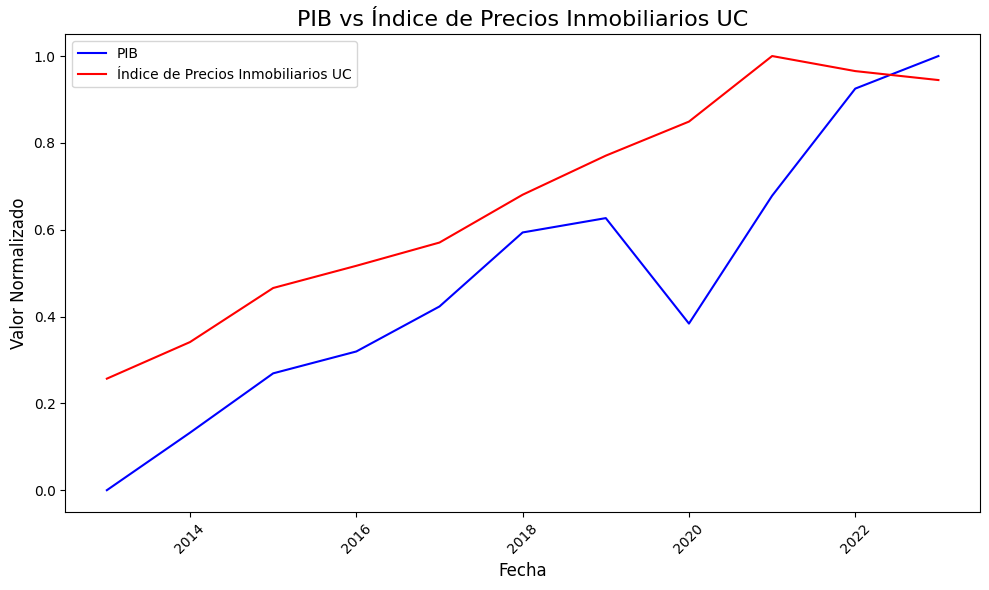

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=merged_df['PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)'], x=merged_df['year'], color='blue', label='PIB')
sns.lineplot(y=merged_df['Region Metropolitana'], x=merged_df['year'], color='red', label='Índice de Precios Inmobiliarios UC')
plt.title('PIB vs Índice de Precios Inmobiliarios UC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor Normalizado', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()



# Hagamos un análisis georeferenciado.

Para ello vamos a usar los datos de la Biblioteca del [congreso nacional](https://www.bcn.cl/siit/mapas_vectoriales).

In [37]:
import geopandas as gpd

In [38]:
df_regiones = gpd.read_file('collected_data/Regiones/Regional.shp')
df_regiones

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


In [39]:
df_regiones = df_regiones[0:16]
df_regiones

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


## Primero ploteamos el mapa para comprender como se visualiza.

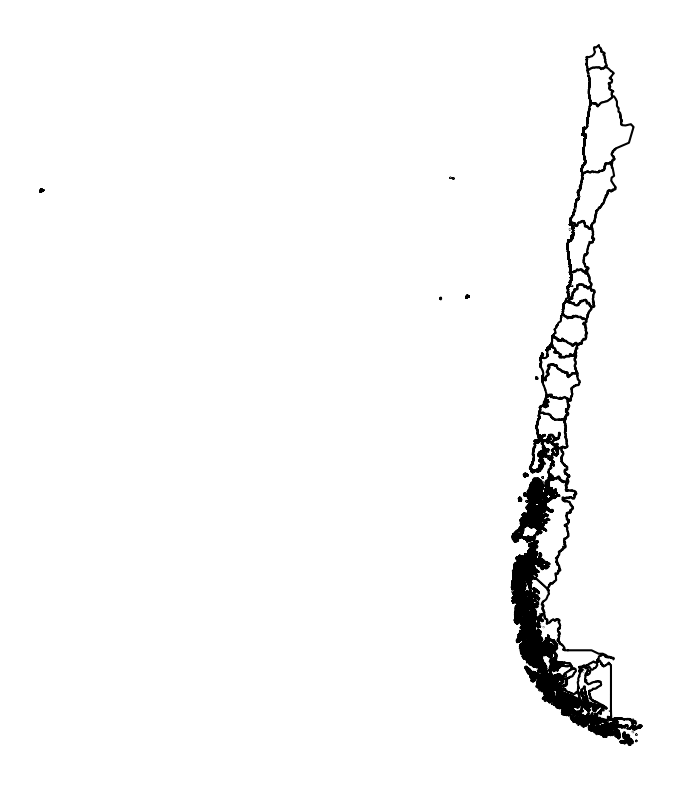

In [40]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
df_regiones.plot(ax=ax, color='white', edgecolor='black', linewidth=1.5)
_=ax.axis('off')

plt.show()

## Vamos a hacer un mapa de calor. La idea es que cada región quede con un color según los valores de la actividad económica, donde el color mas claro es el menor valor de la columna y el más oscuro el mayor.

Primero debemos transponer pib_act_econo_reg_scaled

In [41]:
pib_act_econo_reg_scaled_transposed = pib_act_econo_reg_scaled.T
pib_act_econo_reg_scaled_transposed

,0,1,2,3,4,5,6,7,8,9,10
"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.100384,0.121104,0.12334,0.228039,0.424609,0.455335,0.40385,0.641185,0.790492,1.0
"PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.092327,0.222946,0.270504,0.355014,0.535947,0.63915,0.442182,0.708981,0.907682,1.0
"PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.126003,0.218775,0.2258,0.274769,0.437372,0.510549,0.375703,0.700895,0.909759,1.0
"PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.129438,0.170806,0.178268,0.274381,0.385039,0.416513,0.389158,0.662102,0.880416,1.0
"PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.073905,0.149571,0.216981,0.309074,0.467416,0.602281,0.618772,0.788675,0.902598,1.0
"PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.102203,0.192281,0.287886,0.369138,0.481963,0.555574,0.52813,0.735225,0.897259,1.0
"PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.132444,0.269137,0.319527,0.423155,0.593655,0.626697,0.383758,0.678241,0.924978,1.0
"PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.083731,0.18727,0.29237,0.383752,0.504832,0.588428,0.632607,0.806508,0.91891,1.0
"PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.071767,0.157982,0.256921,0.36557,0.463913,0.55005,0.62681,0.761118,0.901007,1.0
"PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.082465,0.178833,0.248255,0.33692,0.443574,0.513814,0.537672,0.709849,0.850692,1.0


In [42]:
#eliminamos las dos ultimas filas ya que no aportan nada
pib_act_econo_reg_scaled_transposed = pib_act_econo_reg_scaled_transposed[:-2]

## Antes de hacer el merge, debemos considerar que uno de los dos datasets no tiene las regiones ordenadas (En este caso, es el del congreso nacional) Lo que haremos sera ordenarlo por regiones. Para ello vamos ver primero la columna, y manualmente vamos a construir el orden de las regiones.

In [43]:
df_regiones['Region']

0                  Región de Arica y Parinacota
1                            Región de Tarapacá
2                         Región de Antofagasta
3      Región de Magallanes y Antártica Chilena
4     Región de Aysén del Gral.Ibañez del Campo
5                             Región de Atacama
6                            Región de Coquimbo
7                          Región de Valparaíso
8              Región Metropolitana de Santiago
9                           Región de Los Lagos
10                           Región de Los Ríos
11                       Región de La Araucanía
12                           Región del Bío-Bío
13                              Región de Ñuble
14                             Región del Maule
15     Región del Libertador Bernardo O'Higgins
Name: Region, dtype: object

Como vemos, no está ordenada, así que le incorporaremos el orden manualmente.

In [44]:
orden_norte_sur = [
    'Región de Arica y Parinacota',
    'Región de Tarapacá',
    'Región de Antofagasta',
    'Región de Atacama',
    'Región de Coquimbo',
    'Región de Valparaíso',
    'Región Metropolitana de Santiago',
    'Región del Libertador Bernardo O\'Higgins',
    'Región del Maule',
    'Región de Ñuble',
    'Región del Bío-Bío',
    'Región de La Araucanía',
    'Región de Los Ríos',
    'Región de Los Lagos',
    'Región de Aysén del Gral.Ibañez del Campo',
    'Región de Magallanes y Antártica Chilena'
]

df_regiones['Region'] = pd.Categorical(df_regiones['Region'], categories=orden_norte_sur, ordered=True)
df_regiones = df_regiones.sort_values('Region').reset_index(drop=True)

df_regiones

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
4,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
5,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
6,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
7,1099,8,6,16349.029957,2.409028e+10,9.848526e+05,Región del Libertador Bernardo O'Higgins,"MULTIPOLYGON (((-8002300.862 -4023671.372, -80..."
8,1098,9,7,30321.890658,4.596943e+10,1.388328e+06,Región del Maule,"POLYGON ((-8018823.211 -4121471.456, -8018820...."
9,1097,10,16,13104.413231,2.037630e+10,1.074094e+06,Región de Ñuble,"POLYGON ((-8053806.540 -4431488.942, -8053866...."


In [45]:
pib_act_econo_reg_scaled_transposed = pib_act_econo_reg_scaled_transposed.copy()


if len(pib_act_econo_reg_scaled_transposed) == len(df_regiones):  #Esto tambien lo podrias hacer con un try/except
    # Añadimos la nueva columna
    pib_act_econo_reg_scaled_transposed['Region'] = df_regiones['Region'].values
else:
    print("Los DataFrames no tienen la misma longitud, por lo que no se puede añadir la columna.")


pib_act_econo_reg_scaled_transposed



,0,1,2,3,4,5,6,7,8,9,10,Region
"PIB por actividad económica, Región de Arica y Parinacota, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.100384,0.121104,0.12334,0.228039,0.424609,0.455335,0.40385,0.641185,0.790492,1.0,Región de Arica y Parinacota
"PIB por actividad económica, Región de Tarapacá, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.092327,0.222946,0.270504,0.355014,0.535947,0.63915,0.442182,0.708981,0.907682,1.0,Región de Tarapacá
"PIB por actividad económica, Región de Antofagasta, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.126003,0.218775,0.2258,0.274769,0.437372,0.510549,0.375703,0.700895,0.909759,1.0,Región de Antofagasta
"PIB por actividad económica, Región de Atacama, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.129438,0.170806,0.178268,0.274381,0.385039,0.416513,0.389158,0.662102,0.880416,1.0,Región de Atacama
"PIB por actividad económica, Región de Coquimbo, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.073905,0.149571,0.216981,0.309074,0.467416,0.602281,0.618772,0.788675,0.902598,1.0,Región de Coquimbo
"PIB actividad económica, Región de Valparaíso, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.102203,0.192281,0.287886,0.369138,0.481963,0.555574,0.52813,0.735225,0.897259,1.0,Región de Valparaíso
"PIB por actividad económica, Región Metropolitana de Santiago, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.132444,0.269137,0.319527,0.423155,0.593655,0.626697,0.383758,0.678241,0.924978,1.0,Región Metropolitana de Santiago
"PIB por actividad económica, Región del Libertador General Bernardo O Higgins, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.083731,0.18727,0.29237,0.383752,0.504832,0.588428,0.632607,0.806508,0.91891,1.0,Región del Libertador Bernardo O'Higgins
"PIB por actividad económica, Región del Maule, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.071767,0.157982,0.256921,0.36557,0.463913,0.55005,0.62681,0.761118,0.901007,1.0,Región del Maule
"PIB por actividad económica, Región de Ñuble, volumen a precios del año anterior encadenado, series empalmadas, referencia 2018 (miles de millones de pesos encadenados)",0.0,0.082465,0.178833,0.248255,0.33692,0.443574,0.513814,0.537672,0.709849,0.850692,1.0,Región de Ñuble


## Ahora generamos el mapa de calor

In [46]:
pib_act_econo_reg_scaled_transposed = pib_act_econo_reg_scaled_transposed.reset_index()
pib_act_econo_reg_scaled_transposed.drop(columns='index', inplace=True)

In [47]:
pib_act_econo_reg_scaled_transposed

,0,1,2,3,4,5,6,7,8,9,10,Region
0,0.0,0.100384,0.121104,0.12334,0.228039,0.424609,0.455335,0.40385,0.641185,0.790492,1.0,Región de Arica y Parinacota
1,0.0,0.092327,0.222946,0.270504,0.355014,0.535947,0.63915,0.442182,0.708981,0.907682,1.0,Región de Tarapacá
2,0.0,0.126003,0.218775,0.2258,0.274769,0.437372,0.510549,0.375703,0.700895,0.909759,1.0,Región de Antofagasta
3,0.0,0.129438,0.170806,0.178268,0.274381,0.385039,0.416513,0.389158,0.662102,0.880416,1.0,Región de Atacama
4,0.0,0.073905,0.149571,0.216981,0.309074,0.467416,0.602281,0.618772,0.788675,0.902598,1.0,Región de Coquimbo
5,0.0,0.102203,0.192281,0.287886,0.369138,0.481963,0.555574,0.52813,0.735225,0.897259,1.0,Región de Valparaíso
6,0.0,0.132444,0.269137,0.319527,0.423155,0.593655,0.626697,0.383758,0.678241,0.924978,1.0,Región Metropolitana de Santiago
7,0.0,0.083731,0.18727,0.29237,0.383752,0.504832,0.588428,0.632607,0.806508,0.91891,1.0,Región del Libertador Bernardo O'Higgins
8,0.0,0.071767,0.157982,0.256921,0.36557,0.463913,0.55005,0.62681,0.761118,0.901007,1.0,Región del Maule
9,0.0,0.082465,0.178833,0.248255,0.33692,0.443574,0.513814,0.537672,0.709849,0.850692,1.0,Región de Ñuble


## Cada columna representan los datos de un determinado año.


Ahora para generar nuestro mapa con colores vamos a depender del método [cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

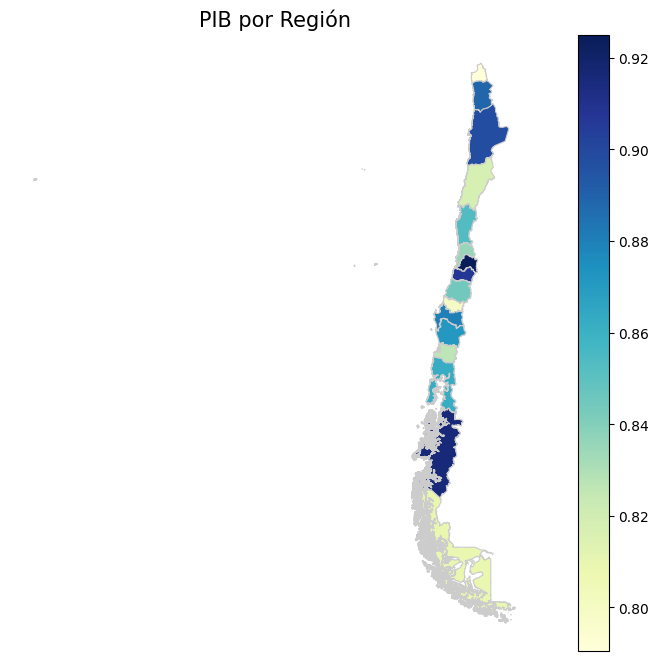

In [49]:
# Unimos los datos
merged_df = df_regiones.merge(pib_act_econo_reg_scaled_transposed[['Region', 9]], on='Region', how='left')

# Normalizamos los valores de la columna '9' para generar la escala de color
min_value = merged_df[9].min()
max_value = merged_df[9].max()

# Graficamos el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Usamos el método plot de GeoPandas, coloreando según los valores de la columna '9' (Investigar que hace cmap)
merged_df.plot(column=9, cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8')

# Añadimos una barra de colores para interpretar los valores
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
fig.colorbar(sm, ax=ax)

# Añadimos un título
plt.title('PIB por Región', fontsize=15)


# desactivamos los ejes para que sea mas bonito
ax.axis('off')
plt.show()
